In [11]:
import ee
import geemap
import pandas as pd
import dtale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold,train_test_split
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score,mean_absolute_percentage_error
import glob
import dask.dataframe as dd
from tpot import TPOTRegressor
import xarray as xr
from scipy import stats
from sklearn.svm import SVR
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import plot_partial_dependence
from warnings import filterwarnings
filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import plotly.express as px
import chart_studio.plotly as py
import folium
from folium.plugins import HeatMap
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
from folium.plugins import FastMarkerCluster
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import os
from sklearn.inspection import permutation_importance


In [12]:
df= pd.read_csv('Combined_S2_LandSat8_S5_Los_Angeles_872_July.csv')
df

,B1,B10,B11,B11_1,B12,B1_1,B2,B2_1,B3,B3_1,...,B5_1,B6,B6_1,B7,B7_1,B8,B8A,B9,NO2_column_number_density,sr_aerosol
0,1395.0,3167.0,3113.0,3703.0,3253.0,1991.0,1666.0,2001.0,2308.0,2274.0,...,2839.0,3945.0,2887.0,3605.0,3093.0,2999.0,3200.0,592.0,0.000079,96
1,4002.0,2844.5,2838.0,3553.0,2779.5,1632.0,4097.0,1552.0,4385.5,1629.0,...,2229.0,4689.5,2555.0,3557.5,2816.5,2726.5,2943.0,1058.5,0.000071,52
2,890.5,3096.5,3050.0,4014.0,3372.0,1785.0,1063.5,1633.0,1541.5,1769.0,...,2495.0,3438.5,2632.0,2840.0,2992.0,2787.0,3283.0,565.0,0.000082,96
3,2681.5,2916.5,2897.5,1689.5,1274.5,1278.0,2825.0,1122.5,3037.5,1125.5,...,1355.0,3884.5,1714.0,3243.5,1965.0,1883.0,2117.0,557.0,0.000075,52
4,1755.5,2725.0,2714.0,3519.0,2848.0,4141.0,1633.5,3965.0,2076.0,3602.0,...,3531.0,2131.0,3619.0,2029.5,3772.0,3504.0,3860.0,839.0,0.000064,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,427.5,3133.0,3084.5,2108.5,1390.0,1258.0,518.0,1062.5,751.0,981.5,...,1164.5,2223.0,1637.5,1481.5,1898.0,1862.0,2127.0,444.0,0.000131,128
868,1131.0,3172.5,3118.5,2972.0,2448.0,1965.0,1365.0,1996.0,1913.5,2102.0,...,2495.0,2926.5,2601.0,2335.0,2781.0,2623.0,2895.0,614.0,0.000079,145
869,2551.0,2883.0,2836.0,3684.0,3085.0,1531.0,2712.0,1453.0,2900.0,1557.0,...,2071.0,4520.0,2358.0,3673.0,2560.0,2514.0,2759.0,689.0,0.000072,8
870,1050.0,3027.0,2994.0,4171.0,3037.0,4239.0,1320.0,3950.0,1774.0,3763.0,...,3817.0,2915.0,3975.0,2375.0,4410.0,3982.0,4580.0,671.0,0.000073,96


In [13]:
X=df.drop('NO2_column_number_density',axis=1).values
y=df['NO2_column_number_density'].values

scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
df_San_Francisco= pd.read_csv('Combined_S2_LandSat8_S5_San_Francisco_July_5000_Points.csv')
X_San_Francisco=df_San_Francisco.drop('NO2_column_number_density',axis=1).values
y_San_Francisco=df_San_Francisco['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_San_Francisco=scaler.fit_transform(X_San_Francisco)
y_San_Francisco=scaler.fit_transform(y_San_Francisco.reshape(-1, 1))

X_train_San_Francisco, X_test_San_Francisco, y_train_San_Francisco, y_test_San_Francisco = train_test_split(X_San_Francisco, y_San_Francisco, test_size=0.30, random_state=42)

In [15]:
df_Texas= pd.read_csv('Combined_S2_LandSat8_S5_Texas_July_5000_Points.csv')
X_Texas=df_Texas.drop('NO2_column_number_density',axis=1).values
y_Texas=df_Texas['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_Texas=scaler.fit_transform(X_Texas)
y_Texas=scaler.fit_transform(y_Texas.reshape(-1, 1))

X_train_Texas, X_test_Texas, y_train_Texas, y_test_Texas = train_test_split(X_Texas, y_Texas, test_size=0.30, random_state=42)


In [16]:
df_North_Dakota= pd.read_csv('Combined_S2_LandSat8_S5_North_Dakota_July_5000_Points.csv')
X_North_Dakota=df_North_Dakota.drop('NO2_column_number_density',axis=1).values
y_North_Dakota=df_North_Dakota['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_North_Dakota=scaler.fit_transform(X_North_Dakota)
y_North_Dakota=scaler.fit_transform(y_North_Dakota.reshape(-1, 1))

X_train_North_Dakota, X_test_North_Dakota, y_train_North_Dakota, y_test_North_Dakota = train_test_split(X_North_Dakota, y_North_Dakota, test_size=0.30, random_state=42)


In [17]:
df_Washington_DC= pd.read_csv('Combined_S2_LandSat8_S5_Washington_DC_July_5000_Points.csv')
X_Washington_DC=df_Washington_DC.drop('NO2_column_number_density',axis=1).values
y_Washington_DC=df_Washington_DC['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_Washington_DC=scaler.fit_transform(X_Washington_DC)
y_Washington_DC=scaler.fit_transform(y_Washington_DC.reshape(-1, 1))

X_train_Washington_DC, X_test_Washington_DC, y_train_Washington_DC, y_test_Washington_DC = train_test_split(X_Washington_DC, y_Washington_DC, test_size=0.30, random_state=42)

In [18]:
model = GradientBoostingRegressor(alpha=0.85, learning_rate=0.5, loss='lad', max_depth=15, max_features=0.9500000000000001,
                                min_samples_leaf=12, min_samples_split=7, n_estimators=100, subsample=0.6500000000000001)
# fit model
model.fit(X_train,y_train)
# make a prediction
prediction=model.predict(X_test)
print('Training Accuracy : %.3f'% model.score(X_train,y_train))

print('Test Accuracy : %.3f'%model.score(X_test,y_test))

Training Accuracy : 0.669
Test Accuracy : 0.274


Mean Squared Error = 0.006860967776990817
Mean absolute percentage error = 0.7559192552327603


Text(0, 0.5, 'NO2_column_number_density')

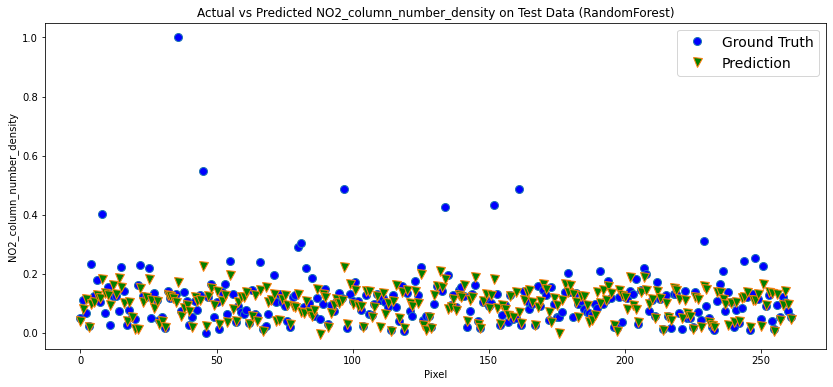

In [19]:
prediction=model.predict(X_test)
MSE=mean_squared_error(y_test,prediction)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test,prediction)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Test Data (RandomForest)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')


Mean Squared Error = 0.17395761382042632
Mean absolute percentage error = 0.8273385789693705
Accuracy for San Francisco: -1.658


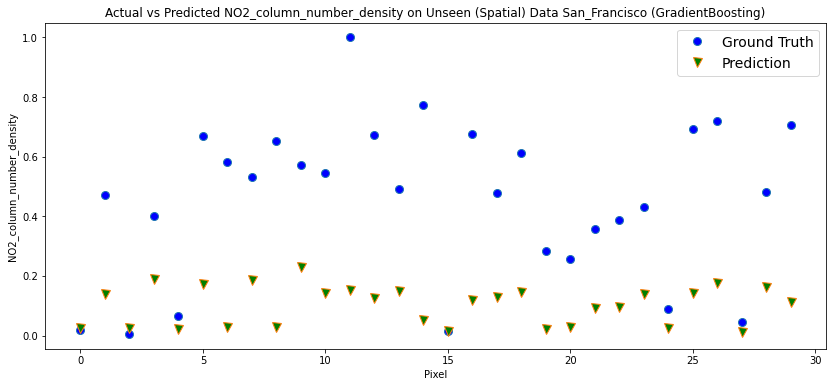

In [20]:
prediction_San_Francisco=model.predict(X_test_San_Francisco)
MSE=mean_squared_error(y_test_San_Francisco,prediction_San_Francisco)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_San_Francisco,prediction_San_Francisco)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_San_Francisco,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_San_Francisco,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data San_Francisco (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for San Francisco: %.3f'%model.score(X_test_San_Francisco,y_test_San_Francisco))

Mean Squared Error = 0.06960460335542644
Mean absolute percentage error = 0.5894669592302748
Accuracy for Texas: -0.833


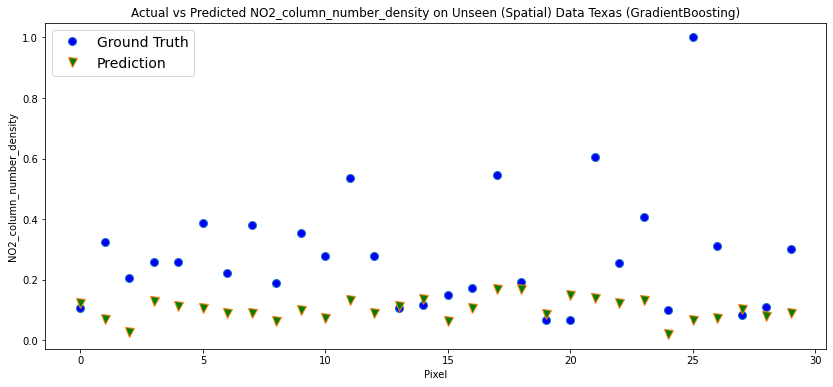

In [21]:
prediction_Texas=model.predict(X_test_Texas)
MSE=mean_squared_error(y_test_Texas,prediction_Texas)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Texas,prediction_Texas)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Texas,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Texas,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Texas (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for Texas: %.3f'%model.score(X_test_Texas,y_test_Texas))

Mean Squared Error = 0.06568771919697322
Mean absolute percentage error = 0.9180828270873176
Accuracy for North_Dakota: -0.568


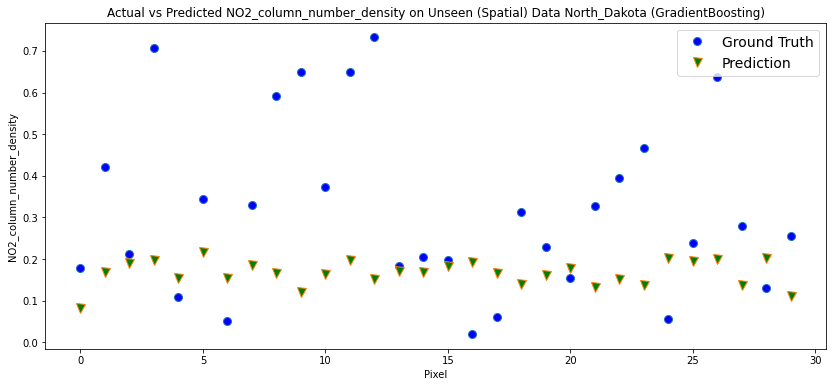

In [22]:
prediction_North_Dakota=model.predict(X_test_North_Dakota)
MSE=mean_squared_error(y_test_North_Dakota,prediction_North_Dakota)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_North_Dakota,prediction_North_Dakota)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_North_Dakota,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_North_Dakota,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data North_Dakota (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')


print('Accuracy for North_Dakota: %.3f'%model.score(X_test_North_Dakota,y_test_North_Dakota))

Mean Squared Error = 0.16181256778476055
Mean absolute percentage error = 0.9145450636836566
Accuracy for Washington_DC: -1.533


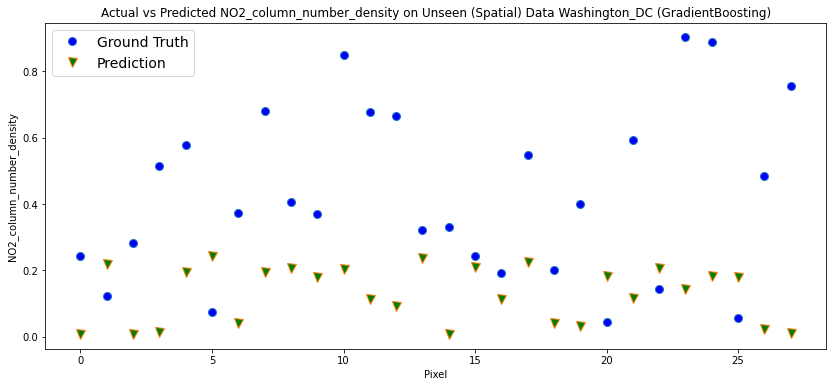

In [23]:
prediction_Washington_DC=model.predict(X_test_Washington_DC)
MSE=mean_squared_error(y_test_Washington_DC,prediction_Washington_DC)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Washington_DC,prediction_Washington_DC)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Washington_DC,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Washington_DC,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Washington_DC (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for Washington_DC: %.3f'%model.score(X_test_Washington_DC,y_test_Washington_DC))

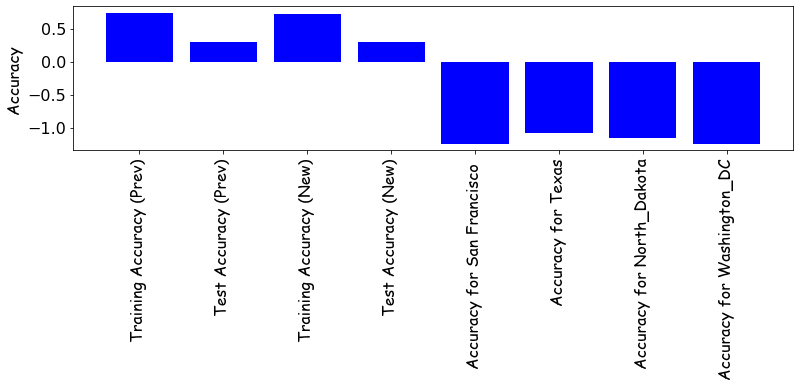

In [24]:
fig = plt.figure(figsize=(10,2))
ax = fig.add_axes([0,0,1,1])
label = ['Training Accuracy (Prev)', 'Test Accuracy (Prev)','Training Accuracy (New)', 'Test Accuracy (New)',
          'Accuracy for San Francisco ','Accuracy for Texas','Accuracy for North_Dakota','Accuracy for Washington_DC']
Accuracy = [0.737,0.298,0.725,0.300,-1.243,-1.086,-1.160,-1.245]
ax.bar(label,Accuracy,color='b')
ax.set_ylabel('Accuracy',fontsize=16, fontname='Comic Sans MS')

#ax.tick_params(axis='x', colors='blue')

#ax.set_title('Variation of E(TPa)',fontsize=16)
#plt.savefig('Accuracy', dpi=72, bbox_inches='tight')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16,rotation=90, fontname='Comic Sans MS')
plt.show()

In [25]:
dtale.show(df_Washington_DC)

In [26]:
dtale.show(df_Texas)

In [27]:
dtale.show(df_North_Dakota)

In [28]:
dtale.show(X_test_North_Dakota)